# Perceptron

In [3]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [1]:
class Perceptron():
    def __init__(self, threshold, lr, iter):
        self._threshold = threshold
        self._lr = lr
        self._iter = iter
    
    def fit(self, X, y):
        self._w = np.zeros(1+X.shape[1])
        self.loss = []

        for _ in range(self._iter):
            error = 0
            for xi, target in zip(X, y):
                update = self._lr * (target - self.predit(xi))
                self._w[1:] += update * xi 
                self._w[0] += update 
                error += int(update != 0.0)
            self.loss.append(error)
            print(self._w)
        return self

    def feed(self, X):
        return np.dot(X, self._w[1:]) + self._w[0] # np.dot => matrics multifly

    def predit(self, X):
        return np.where(self.feed(X) > self._threshold, 1, -1)

Iris 데이터셋 불러오기

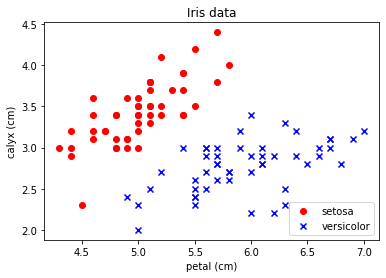

In [20]:
iris = load_iris()
X = iris.data[:100,[0,1]]
y = iris.target[:100]
y = np.where(y==0, -1, 1)

# Draw plt
plt.scatter(X[:50,0], X[:50, 1], color='r', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1], color='b', marker='x', label='versicolor')
plt.title('Iris data')
plt.xlabel('petal (cm)')
plt.ylabel('calyx (cm)')
plt.legend(loc=4)
plt.show()

In [26]:
threshold = 0.0
lr = 0.001
iter = 20

p = Perceptron(threshold, lr, iter)
p.fit(X, y)
print(p.loss)

[0.002  0.014  0.0064]
[ 0.      0.008  -0.0002]
[ 0.      0.0118 -0.0008]
[ 0.      0.0156 -0.0014]
[-0.002   0.0104 -0.0066]
[-0.002   0.0142 -0.0072]
[-0.002   0.018  -0.0078]
[-0.002   0.0206 -0.0084]
[-0.004   0.0146 -0.015 ]
[-0.004   0.0184 -0.0156]
[-0.004   0.0222 -0.0162]
[-0.004   0.0248 -0.0168]
[-0.006   0.0196 -0.022 ]
[-0.006   0.0234 -0.0226]
[-0.006   0.0272 -0.0232]
[-0.006   0.0296 -0.0236]
[-0.008   0.0244 -0.0288]
[-0.008   0.0282 -0.0294]
[-0.008  0.032 -0.03 ]
[-0.01    0.0268 -0.0352]
[1, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3]


In [28]:
test_X = iris.data[100:110, [0, 1]]
test_y = iris.target[100:110]

w1 = -0.01
w2 = 0.0268
w3 = -0.0352

for x, target in zip(test_X, test_y):
    predit = w1 + w2*x[0] + w3*x[1]
    print("Iris-setosa" if predit <= 0 else "Iris-versicolor")


Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
